# Titanic Data Analysis
## Background Information
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, What factors made people more likely to survive?


## Workflow Stages
In this solution workflow,I would like to work on these stages of the following:                
1.Question for investigation.                   
2.Extract,understand and cleanse the data.                 
3.Analyze,and explore the data.                  
4.Draw conclusions.                                            

### 1. Questions For Investigation
* What is the proportion of the survival?
* Is there most of women and children survived?
* Is there any relationship between age,gender and survival?


### 2. Extract,understand,and cleanse the data
#### 2.1 Extract data

In [5]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set default text size of visualisation
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# read the data, get cvs file as DataFrame
data = pd.read_csv('titanic-data.csv')
print('Datasets:',data.shape)

Datasets: (891, 12)


#### 2.2 Understand data

In [14]:
# Showing a few lines of data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### VARIABLE DESCRIPTIONS:
We're working with 891 observations of 12 variables.The following is a description of each variable. 

**survival**: Survival	(0 = No, 1 = Yes)                                           
**pclass**: 	Ticket class	(1 = 1st-Upper, 2 = 2nd-Middle, 3 = 3rd-Lower)            
**sex**: 	Sex	
**Age**: 	Age in years	
**sibsp**: 	# of siblings / spouses aboard the Titanic	
**parch**: 	# of parents / children aboard the Titanic	
**ticket**: 	Ticket number	
**fare**: 	Passenger fare	
**cabin**: 	Cabin number	
**embarked**: 	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


According to the above information,We found out that some columns have missing values. For example:
* Age has 177 missing values.
* Carbin has 687 missing values,miss rate is 77%.
* Embarked only has 2 missing values


#### 2.3 Cleanse data
** Fill missing values of age with the average of age **

In [20]:
data.loc[(data.Age.isnull()), 'Age'] = data.Age.mean()
data['Age'].hasnans

False

** Fill missing values of Cabin with 'U' (for unknown) **

In [25]:
data.loc[(data.Cabin.isnull()), 'Cabin'] = 'U'
data['Cabin'].hasnans

False

### 3.Analyze,and explore the data
#### 3.1 Statistical Summaries

In [17]:
# Statistical description of the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to above statistical Description:
* The mean of survived tells us that about 38% survival rate.
* The minimum age is 0.42,that could have a baby in the ship
* The minimum fare is 0, that could be crew which don't need to pay

#### 3.2 Heatmap to show which variables are important 

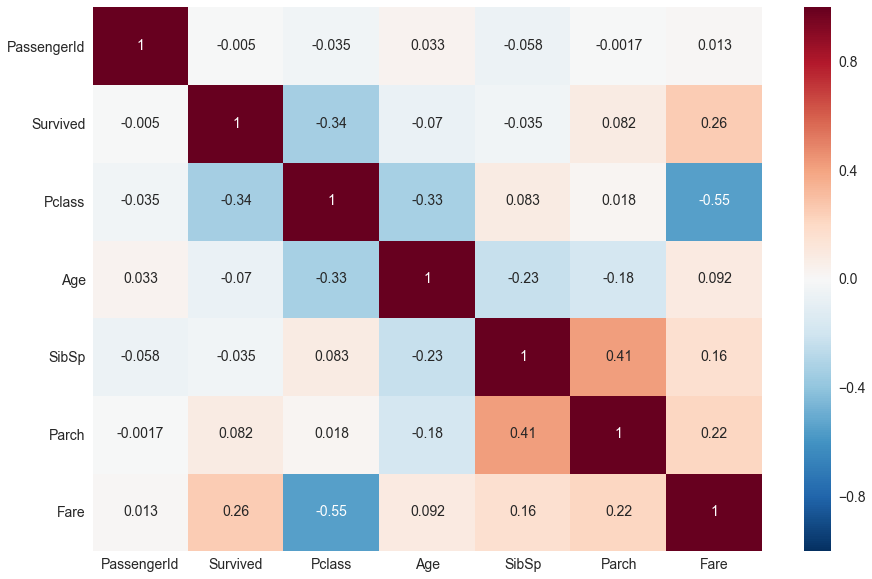

In [27]:
f, ax =plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),
            annot = True,
            ax = ax)
sns.plt.show()

#### 3.3 Distribution of categorical variables

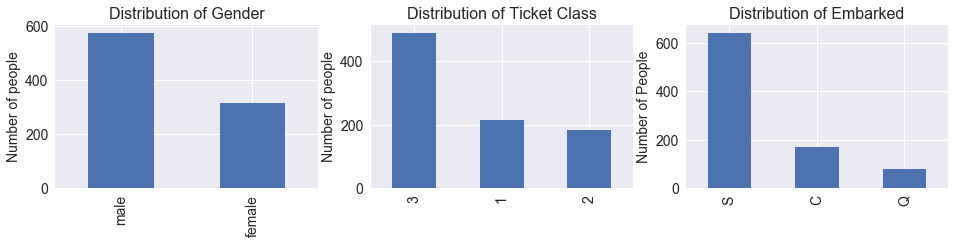

In [31]:
plt.figure(figsize=(16,3))

plt.subplot(1,3,1)
data.Sex.value_counts().plot(kind ='bar')
plt.title('Distribution of Gender')
plt.ylabel('Number of people')

# (1 = 1st-Upper, 2 = 2nd-Middle, 3 = 3rd-Lower)
plt.subplot(1,3,2)
data.Pclass.value_counts().plot(kind ='bar')
plt.title('Distribution of Ticket Class')
plt.ylabel('Number of people')
           
plt.subplot(1,3,3)
data.Embarked.value_counts().plot(kind='bar')
plt.title('Distribution of Embarked')
plt.ylabel('Number of People')

plt.show()
plt.close()


#### 3.4 Exploring the relationship between the feathures and survival of passengers

##### 3.4.1 Investigating categorical variables

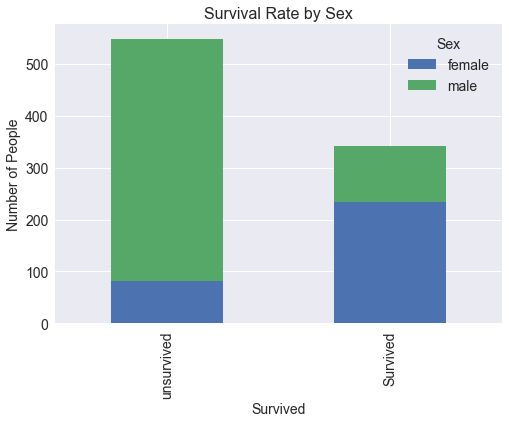

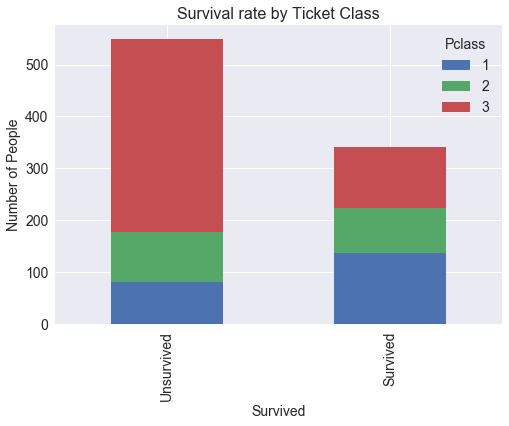

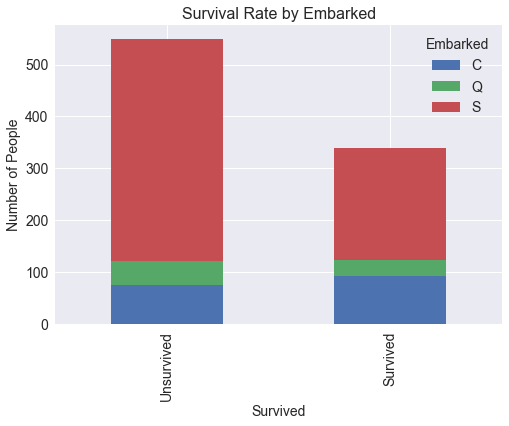

In [32]:
# survival rate by gender
suvival_by_sex = data.groupby(['Sex','Survived']).size().unstack()
suvival_by_sex.T.plot(kind='bar',stacked=True)
plt.title('Survival Rate by Sex')
plt.ylabel('Number of People')
plt.xticks([0,1],['unsurvived','Survived'])

# survival rate by ticket class
survival_by_pclass = data.groupby(['Pclass','Survived']).size().unstack()
survival_by_pclass.T.plot(kind='bar',stacked=True)
plt.title('Survival rate by Ticket Class')
plt.ylabel('Number of People')
plt.xticks([0,1],['Unsurvived','Survived'])

# survival rate by embarked
survival_by_embarked = data.groupby(['Embarked','Survived']).size().unstack()
survival_by_embarked.T.plot(kind='bar',stacked=True)
plt.title('Survival Rate by Embarked')
plt.ylabel('Number of People')
plt.xticks([0,1],['Unsurvived','Survived'])

plt.show()

* Obviously the probability of women being rescued was significantly higher than that of men.
* The survived propotion of 1st passengers is much highter than other class. Seems like different class or passenger level may be related to wealth, the survived probabilty may be different. 

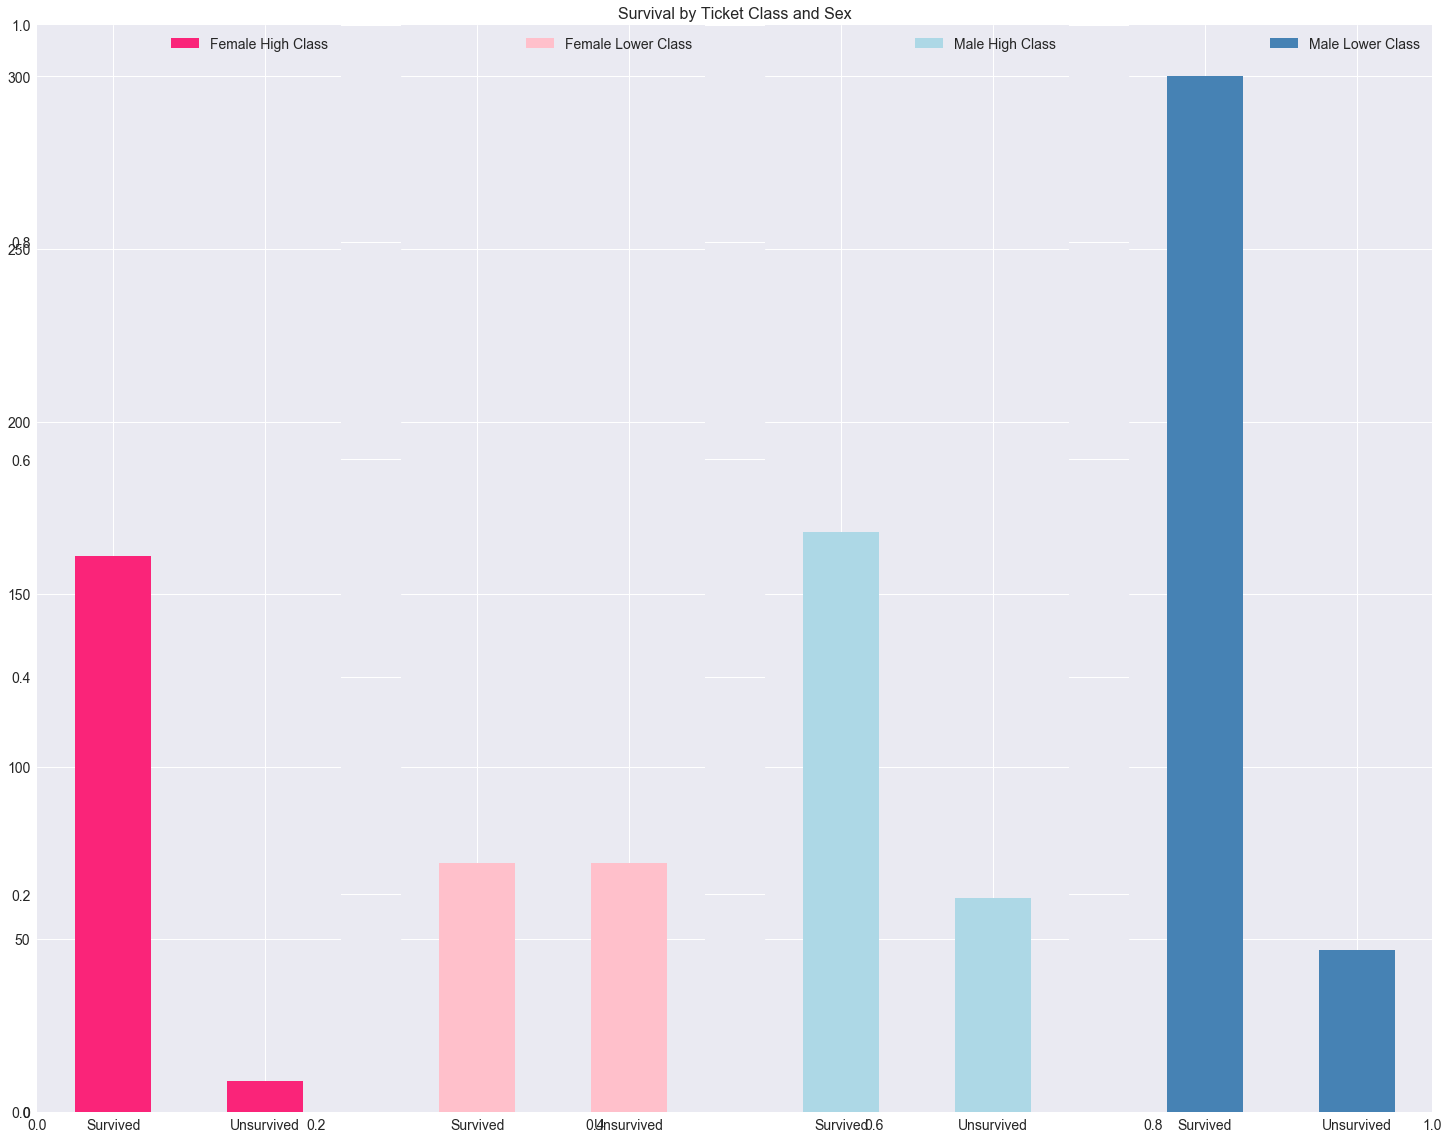

In [33]:
fig=plt.figure(figsize=(25,20))
fig.set(alpha=0.65)
plt.title('Survival by Ticket Class and Sex')

ax1 = fig.add_subplot(141)
data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(['Survived', 'Unsurvived'], rotation=0)
ax1.legend(['Female High Class'], loc='best')


ax2 = fig.add_subplot(142, sharey=ax1)
data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts().plot(kind='bar', label="female low class", color='pink')
ax2.set_xticklabels(['Survived', 'Unsurvived'], rotation=0)
ax2.legend(['Female Lower Class'], loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts().plot(kind='bar', label="male high class", color='lightblue')
ax3.set_xticklabels(['Survived', 'Unsurvived'], rotation=0)
ax3.legend(['Male High Class'], loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts().plot(kind='bar', label="male high class", color='steelblue')
ax4.set_xticklabels(['Survived', 'Unsurvived'], rotation=0)
ax4.legend(['Male Lower Class'], loc='best')

plt.show()

It proves what different class affects the survived. So this must be a feature.

** Were Siblings or Parent factor to survived? **

In [357]:
survival_by_sibSp = data.groupby(['SibSp','Survived']).sum()

print('Survival by Siblings/spouses \n')
survival_by_sibSp

Survival by Siblings/spouses 



PassengerId  Pclass      Age  Parch       Fare
SibSp Survived                                                
0     0              184300    1004  9672.50     43  6611.6071
      1               92565     426  5115.75     70  9009.1459
1     0               40630     232  2739.00     71  3256.1710
      1               51273     198  2767.42     66  5970.6294
2     0                5221      39   364.00      5   511.2000
      1                6327      27   201.50     13   937.9041
3     0                3901      34    57.00     17   539.6918
      1                1244       7   110.00      4   562.8500
4     0                6304      45   102.00     21   502.7000
      1                 565       9    25.00      6    70.7000
5     0                1684      15    51.00     10   234.5000
8     0                3372      21      NaN     14   486.8500

In [358]:
survival_by_Parch = data.groupby(['Parch','Survived']).sum()
print('Survival by parents/children \n')
survival_by_Parch

Survival by parents/children 



PassengerId  Pclass       Age  SibSp       Fare
Parch Survived                                                 
0     0              201955    1121  10747.50     83  7363.9154
      1               99928     453   6017.50     78  9983.9171
1     0               20932     131   1302.00     82  1966.9170
      1               33951     129   1384.42     46  3552.9082
2     0               17336     107    493.00    131  2225.0000
      1               15997      75    677.75     34  2922.0083
3     0                 824       6     64.00      2    68.7500
      1                2072       7    102.00      3    61.0083
4     0                1536      10    178.00      3   339.8750
5     0                2150      12    158.00      2   131.3625
      1                  26       3     38.00      1    31.3875
6     0                 679       3     43.00      1    46.9000

** Above of these graphs,tell us:**
* Survived women more than men
* The propotion of 1st class is more than others
* Seems like the survived rate of S port is very low 
* Have not found out particularly feature survived between siblings or Parent

##### 3.4.2 Investigating numeric variables

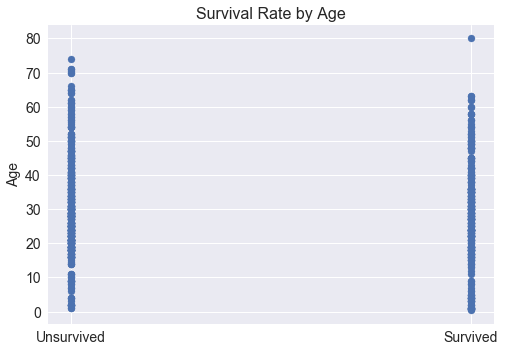

In [285]:
# survival rate by age
plt.scatter(data.Survived,data.Age)
plt.title('Survival Rate by Age')
plt.ylabel('Age')
plt.xticks([0,1],['Unsurvived','Survived'])
plt.show()

In this chart,there is no difference in the age of the people who were died and survived .

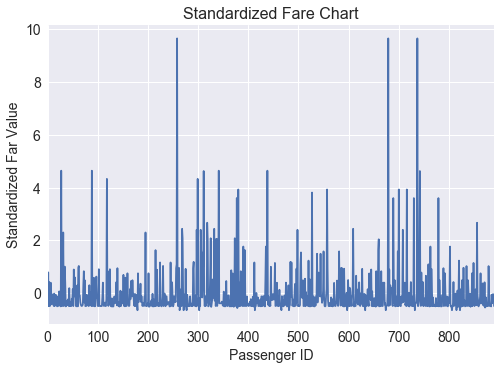

In [360]:
# Standardizing the data Fare
data_fare = data['Fare']
((data_fare - data_fare.mean())/data_fare.std()).plot()
plt.title('Standardized Fare Chart')
plt.xlabel('Passenger ID')
plt.ylabel('Standardized Far Value')
plt.show()

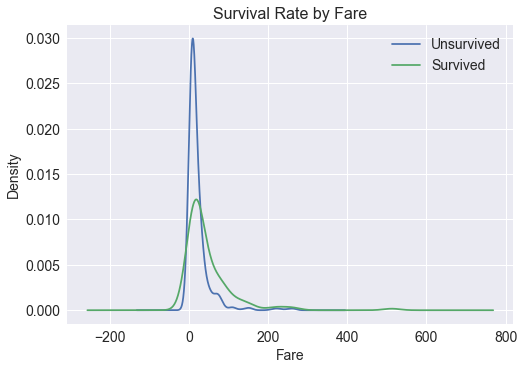

In [286]:
# survival rate by fare
data.Fare[data.Survived==0].plot(kind='kde')
data.Fare[data.Survived==1].plot(kind='kde')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.legend(('Unsurvived','Survived'),loc='best')
plt.show()

Considering the graph above,we've already know:
* Gender and different class are a factor which effects the results of survival.

##### 3.4.3 Investigating mix variables

** Is there any relationship between age, sex and surviving?**

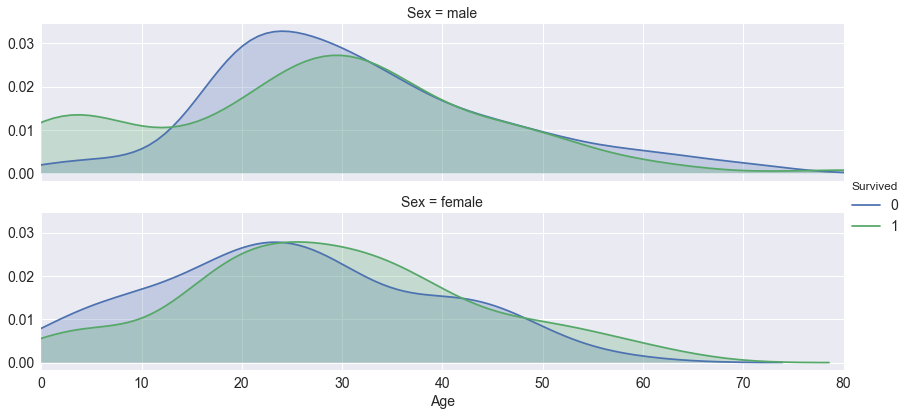

In [363]:
facet = sns.FacetGrid(data,hue='Survived',row='Sex',aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0,data['Age'].max()))
facet.add_legend()
plt.show()

According to these chart,there are more people who surive that ones who died under 15 years old,and the people who are under 10 years old are surived more than the girls of the same age group. 

### 4 Conclusions

In this investigation,we have something missing values such as cabin which is the most missing value, so we can't make sure whether it influence our results.We also has about 20% of miss rate in age column, but there is the simple way to fill them with average of age.

what factors made people more likely to survive?
In this shipwreck,about 38% people were survived, which women account for the vast majority.At that age, different ticket class maybe be related to wealth,but correlation doesn't imply causation,so might not be a relationship.However the upper classes probaility of being rescued is much higher.Unfortunately,people who are under 15 years old, there are more alive people that dead.In the end,let's stand in silent tribute to the victims of Titanic wreck.